## Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division, print_function
%cd -q ../test/

In [3]:
import matplotlib
pylab_defaults = { 
    'font.size': 12,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
    'font.family' : 'sans-serif',
    'font.sans-serif' : ['Helvetica'],
    }
matplotlib.rcParams.update(pylab_defaults)

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import os
import numpy as np
np.set_printoptions(precision=4, suppress=True)
scale = 4
scale = 1
fig_width_pt = 244. * scale # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
#HACK for debugging
#fig_width = 21
figsize=(fig_width, .618*fig_width)

To install the required libraries, use:

````

pip3 install --user git+https://github.com/bicv/SLIP
pip3 install --user git+https://github.com/bicv/LogGabor
pip3 install --user git+https://github.com/bicv/SparseEdges

````

In [4]:
#figpath, ext = os.path.join(os.getenv('HOME'), 'pool/science/RetinaClouds/2016-05-20_nips'), '.pdf'
figpath = '.'
try:
    os.mkdir(figpath)
except:
    pass

experiment = 'EUVIP-sparseness'
name_database = 'serre07_distractors'
parameter_file = 'https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py'
lena_file = 'https://raw.githubusercontent.com/bicv/SparseEdges/master/database/lena256.png'
N_image = 100
N = 2**12
do_linear = False
do_linear = True

defining framework


In [5]:
from SparseEdges import SparseEdges
mp = SparseEdges(parameter_file)
mp.pe.N_X, mp.pe.N_Y = 64, 64
mp.pe.formats = ['pdf', 'png', 'svg']
mp.pe.figpath = '../docs/'
mp.init()
print ('Range of spatial frequencies: ', mp.sf_0)

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213]


Standard edges are oriented, but one may modify that:

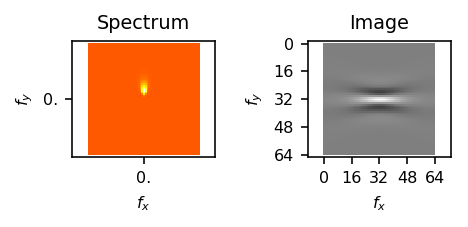

In [6]:
if "__file__" not in dir():
    sf_0 = .09 # TODO .1 cycle / pixel (Geisler)
    params= {'sf_0':sf_0, 'B_sf': mp.pe.B_sf, 'theta':np.pi, 'B_theta': mp.pe.B_theta}
    FT_lg = mp.loggabor(mp.pe.N_X/2, mp.pe.N_Y/2, **params)
    #(fourier_domain(mp.normalize(np.absolute(FT_lg), center=False))+ image_domain(mp.normalize(mp.invert(FT_lg), center=False)))
    fig, a1, a2 = mp.show_FT(FT_lg, axis=True, figsize=(fig_width, fig_width/2))
    fig.tight_layout()
    mp.savefig(fig, experiment + '_loggabor');

When defining the framework, one defines different angles:

In [7]:
print ('Range of angles (in degrees): ', mp.theta*180./np.pi)

Range of angles (in degrees):  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]


In [8]:
print('Final sparseness in the representation = {}'.format(mp.pe.N/mp.oc))
print('Final sparseness in the pyramid = {}'.format(mp.pe.N/(4/3*mp.pe.N_X*mp.pe.N_Y)))

Final sparseness in the representation = 0.0026041666666666665
Final sparseness in the pyramid = 0.375
